#### About

This file contains code to build a collaborative filtering predictor trained on a reduced set of beer reviews.

- num reviews: 4,837,392 (out of 5,487,730)
- num beers: 9,999 (out of 24,542)
- num users: 5,2707 (out of 101,574)

This code follows the blog about recommenders found [here](https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
%matplotlib inline

In [54]:
# has beer names
df_orig = pd.read_csv('./Beer_Data/reduced_data.csv')

In [56]:
# totally numeric, no beer names
df = pd.read_csv('./Beer_Data/reduced_data_X2.csv')

In [57]:
# beer names to ID's
beer_ids = pd.read_csv('./Beer_Data/beer_ids.csv')

In [108]:
# average ratings for each beer
ratings = pd.DataFrame(df.groupby('beer_id')['user_score'].mean())
ratings.head()

,user_score
beer_id,
1,3.930294
2,3.886535
4,4.079014
7,4.046891
8,3.948026


In [109]:
# add total number of ratings
ratings['num_ratings'] = df.groupby('beer_id')['user_score'].count()
ratings.head()

,user_score,num_ratings
beer_id,,
1,3.930294,102
2,3.886535,101
4,4.079014,142
7,4.046891,476
8,3.948026,76


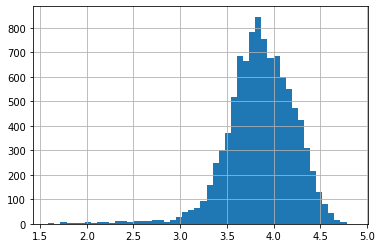

In [110]:
ratings['user_score'].hist(bins=50)

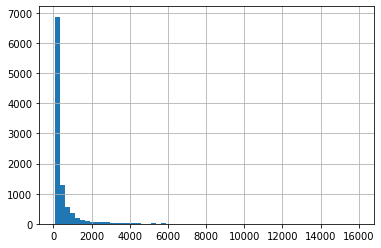

In [111]:
ratings['num_ratings'].hist(bins=60)

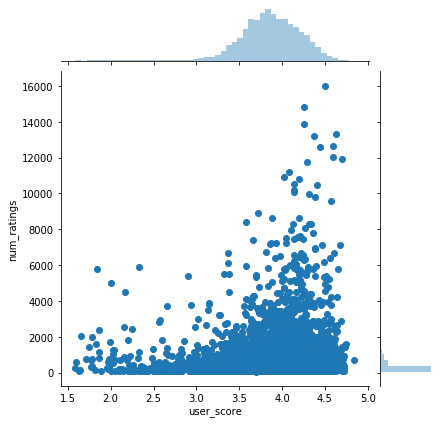

In [66]:
sns.jointplot(x='user_score', y='num_ratings', data=ratings)

In [67]:
beer_matrix = df.pivot_table(values='user_score', index='user_id', columns='beer_id')
beer_matrix.head()


beer_id,1,2,4,7,8,9,10,12,13,15,...,24513,24516,24519,24529,24531,24532,24535,24536,24537,24538
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.50,4.25,4.25,4.75,NaN,4.25,4.75,NaN,4.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.00,3.59,4.50,5.00,4.85,4.00,4.75,4.75,4.68,4.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.25,4.50,4.25,4.25,4.25,3.50,4.25,4.00,4.25,NaN,...,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.00,NaN,NaN,4.00,NaN,NaN,4.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.50,3.00,4.00,4.00,4.50,NaN,3.50,4.00,3.65,2.50,...,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# sort the num_ratings per beer from most to least
ratings = ratings.sort_values('num_ratings', ascending=False)

### Demo:

Assume a user has had beer number 15 and beer number 24513. Determine what beer to recommend to this user.

In [116]:
# get ratings for each beer, so that the correlation between the two reviews
# can be computed
b_15_ratings = beer_matrix[15]
b_24513_ratings = beer_matrix[24513]
b_15_ratings.head()

user_id
1     NaN
2    4.39
3     NaN
4     NaN
5    2.50
Name: 15, dtype: float64

In [154]:
# get the correlation between beer 15 and all other beers
similar_to_b_15 = beer_matrix.corrwith(b_15_ratings)

C:\Users\BTron\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\BTron\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [132]:
similar_to_b_15 = similar_to_b_15.to_frame(name='corr').sort_values(by='corr', ascending=False)

In [145]:
# get the correlation between beer 24513 and all other beers
similar_to_b_24513 = beer_matrix.corrwith(b_15_ratings)

C:\Users\BTron\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\BTron\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [146]:
similar_to_b_24513 = similar_to_b_24513.to_frame(name='corr').sort_values(by='corr', ascending=False)

In [150]:
similar_to_b_15[similar_to_b_15['corr'] == 1]

,corr
beer_id,
10448,1.0
20161,1.0
1113,1.0
4595,1.0
20292,1.0
...,...
6783,1.0
8575,1.0
2860,1.0


In [151]:
similar_to_b_24513[similar_to_b_24513['corr'] == 1]

,corr
beer_id,
10448,1.0
20161,1.0
1113,1.0
4595,1.0
20292,1.0
...,...
6783,1.0
8575,1.0
2860,1.0
